In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE

In [4]:
# Step 1: Load Dataset
file_path = r"C:\Users\DIYA GOPAL\Downloads\creditcard.csv\creditcard.csv"
df = pd.read_csv(file_path)
print("Data loaded. Shape:", df.shape)


Data loaded. Shape: (284807, 31)


Class
0    284315
1       492
Name: count, dtype: int64


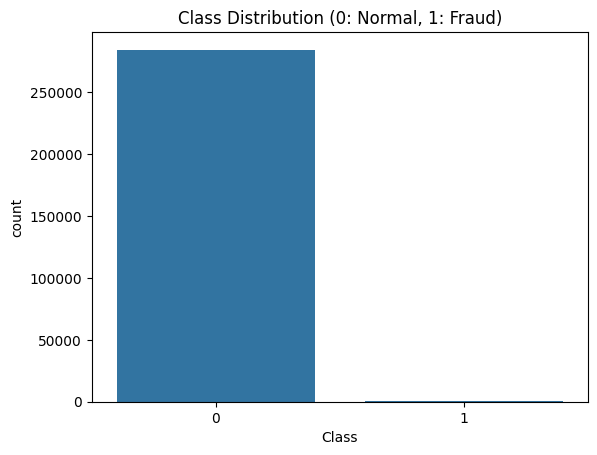

In [5]:
# Step 2: Data Exploration
print(df['Class'].value_counts())
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0: Normal, 1: Fraud)")
plt.show()

In [6]:
# Step 3: Data Preprocessing
X = df.drop(['Class', 'Time'], axis=1)  # Drop time as it has little significance
y = df['Class']

# Scale 'Amount' column
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))


In [7]:
# Step 4: Handle Class Imbalance with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print("Resampled dataset shape:", pd.Series(y_res).value_counts())


Resampled dataset shape: Class
0    284315
1    284315
Name: count, dtype: int64


In [10]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [11]:
# Step 6: Train Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Step 7: Evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))



Confusion Matrix:
 [[56738    12]
 [    0 56976]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


ROC-AUC Score: 0.9999990581087081


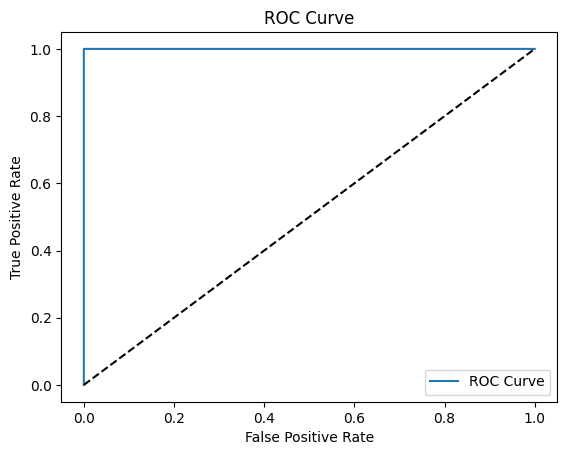

In [13]:
# Step 8: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [22]:
# Step 9: Fraud Prediction Example
def predict_fraud(transaction_features):
    # Assume Amount is the last value in the list (index -1)
    amount = np.array(transaction_features[-1]).reshape(-1, 1)
    scaled_amount = scaler.transform(amount)[0][0]  # Get the scaled scalar

    # Replace the original amount with scaled amount
    transaction_features[-1] = scaled_amount

    # Convert to NumPy array and reshape for prediction
    transaction_features = np.array(transaction_features).reshape(1, -1)
    
    prediction = model.predict(transaction_features)
    return "Fraud" if prediction[0] == 1 else "Normal"



In [ ]:
example_transaction = [
    -1.35980713, -0.07278117, 2.53634674, 1.37815522, -0.33832077, 0.46238778,
    0.23959855, 0.0986979, 0.36378697, 0.09079417, -0.55159953, -0.61780086,
    -0.99138985, -0.31116935, 1.46817697, -0.47040053, 0.20797124, 0.02579058,
    0.40399296, 0.2514121, -0.01830678, 0.27783758, -0.11047391, 0.06692808,
    0.12853936, -0.18911484, 0.13355838, -0.02105305, 0.01472417
]

print("Transaction prediction:", predict_fraud(example_transaction))

Transaction prediction: Normal


c:\Users\DIYA GOPAL\OneDrive\Desktop\AAIML\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
